In [956]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import datetime as dt
import re
from textblob import TextBlob
from nltk.corpus import stopwords


In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

In [957]:
wordnet_lemmatizer = WordNetLemmatizer()
english = set(nltk.corpus.words.words())


In [958]:
df4 = pd.read_csv('yelp_reviews_v2.csv')

In [959]:
def lemmadata(doc):
    words_in_reviews = [word.lower().split() for word in doc]
    lemmatizer=WordNetLemmatizer()   
#     ps = PorterStemmer() 
#     df_analyse = [ps.stem(word) for word in df_analyse]
    df_analyse = doc.apply(lambda x: " ".join([Word(word).lower() for word in x.split()]))
    stop = stopwords.words('english')
    df_analyse = df_analyse.str.replace("[()!.,*(+?{}|)!\%[]=^`~$'/@#-]",'')
    df_analyse = df_analyse.str.replace('[(":&`~)]','')
    df_analyse = df_analyse.str.replace("[,.';@!?-]",'')
    df_analyse = df_analyse.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # df_analyse = df_analyse.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    df_analyse = df_analyse.apply(lambda x: " ".join([lemmatizer.lemmatize(Word(word)) for word in x.split()]))
    # df_analyse = df_analyse.apply(lambda x: " ".join([ps.stem(word) for word in x.split()])) 
    return df_analyse

<>:8: DeprecationWarning: invalid escape sequence \%
<>:8: DeprecationWarning: invalid escape sequence \%
<>:8: DeprecationWarning: invalid escape sequence \%
<ipython-input-959-3c9a4c90024e>:8: DeprecationWarning: invalid escape sequence \%
  df_analyse = df_analyse.str.replace("[()!.,*(+?{}|)!\%[]=^`~$'/@#-]",'')


In [790]:
def sentiment(doc):
    score = TextBlob(doc).polarity
    return score

In [961]:
df4['lemmatized'] = lemmadata(df4['description'])

In [962]:
df4['sentiment_score'] = df4['description'].apply(sentiment)

In [963]:
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
# result = [i for i in tokens if not i in stop_words]

In [964]:
df4['date'] = pd.to_datetime(df4['datePublished'])
df4['Month'] = df4['date'].dt.month
df4['Year'] = df4['date'].dt.year

In [431]:
z.to_csv('df4.csv', index=False)

In [965]:
df4['streetAddress'] = df4['streetAddress'].fillna(value='na')
df4['author_url'] = df4['author_url'].fillna(value='na')


In [988]:
df4.isna().sum()

Unnamed: 0         0
vendor             0
streetAddress      0
city               0
state              0
postalCode         0
author             0
ratingValue        0
datePublished      0
description        0
author_url         0
lemmatized         0
sentiment_score    0
date               0
Month              0
Year               0
dtype: int64

In [968]:
from tqdm import tqdm_notebook as tqdm

In [969]:
z = pd.DataFrame()

for x in tqdm(range(1, 13)):
    
    for y in list(df4.state.unique()):
        
        for w in list(df4.Year.unique()):
            
            df2 = df4[(df4.Month==x) & (df4.state == y) & (df4.Year == w)]
            
            if df2.empty:
                pass
            
            else:
                vec2 = CountVectorizer(ngram_range=(2, 2)).fit(df2.lemmatized)
                bag_of_words2 = vec2.transform(df2.lemmatized)
                sum_words2 = bag_of_words2.sum(axis=0) 

                vec3 = CountVectorizer(ngram_range=(3, 3)).fit(df2.lemmatized)
                bag_of_words3 = vec3.transform(df2.lemmatized)
                sum_words3 = bag_of_words3.sum(axis=0) 

                words_freq2 = [[word, sum_words2[0, idx], x, y, w] for word, idx in vec2.vocabulary_.items()]
                words_freq3 = [[word, sum_words3[0, idx], x, y, w] for word, idx in vec3.vocabulary_.items()]

                words_freq2 =sorted(words_freq2, key = lambda x: x[1], reverse=True)
                words_freq3 =sorted(words_freq3, key = lambda x: x[1], reverse=True)

                words_freq = words_freq2 + words_freq3
                words_freq = pd.DataFrame(words_freq)
                words_freq = words_freq[words_freq[1] > 1]
#                 words_freq['group_sentiment'] = words_freq[0].apply(lambda x: df2[[x in y for y in df2.lemmatized]].sentiment_score.mean())
#                 words_freq['group_rating'] = words_freq[0].apply(lambda x: df2[[x in y for y in df2.lemmatized]].ratingValue.mean())

                words_freq['description'] = words_freq[0].apply(lambda x: df2[df2.lemmatized.str.contains(x)].description.to_list())
                words_freq = words_freq.explode('description')
                words_freq = pd.merge(words_freq, df2[['author_url', 'description', 'author', 'date', 'vendor', 'streetAddress', 'postalCode', 'ratingValue', 'sentiment_score']], on = 'description', how = 'left')
                
                z = z.append(words_freq)
                


/opt/anaconda3/lib/python3.7/site-packages/tqdm/__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pas

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pas

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [972]:
z.columns = ['bigram', 'count', 'month', 'state', 'year', 'reviews', 'user_id', 'author', 'date', 'vendor', 'street_address', 'postal_code', 'individual_rating', 'individual_score']

In [974]:
z['duplicate_tracker'] = z.duplicated(subset=['month','state', 'year', 'bigram'], keep='first')

In [979]:
z = z.dropna(subset=['reviews'])

In [986]:
z.head()

,bigram,count,month,state,year,reviews,user_id,author,date,vendor,street_address,postal_code,individual_rating,individual_score,duplicate_tracker
0,manhattan florist,5,1,NY,2020,Stopped in to Manhattan florist today to selec...,/user_details?userid=ljJErTlSHJlm1kCIuOkOGg,Ellen Y.,2020-01-15,ManhattanFlorist.com,87 Bayard St,10013.0,5.0,0.413889,False
1,manhattan florist,5,1,NY,2020,Manhattan Florist is amazing! 5 stars! I recen...,/user_details?userid=Xo8C3iFCljZXXKd8BSs4sw,Sarah F.,2020-01-13,ManhattanFlorist.com,87 Bayard St,10013.0,5.0,0.370198,True
2,valentine day,3,1,NY,2020,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,Eric C.,2020-01-29,Ode à la ROSE,120 W 28th St,10001.0,2.0,0.261275,False
4,la rose,3,1,NY,2020,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,Eric C.,2020-01-29,Ode à la ROSE,120 W 28th St,10001.0,2.0,0.261275,False
5,get flower,3,1,NY,2020,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,Eric C.,2020-01-29,Ode à la ROSE,120 W 28th St,10001.0,2.0,0.261275,False


In [982]:
z.isna().sum()

bigram               0
count                0
month                0
state                0
year                 0
reviews              0
user_id              0
author               0
date                 0
vendor               0
street_address       0
postal_code          0
individual_rating    0
individual_score     0
duplicate_tracker    0
dtype: int64

In [983]:
z.reset_index()

,index,bigram,count,month,state,year,reviews,user_id,author,date,vendor,street_address,postal_code,individual_rating,individual_score,duplicate_tracker
0,0,manhattan florist,5,1,NY,2020,Stopped in to Manhattan florist today to selec...,/user_details?userid=ljJErTlSHJlm1kCIuOkOGg,Ellen Y.,2020-01-15,ManhattanFlorist.com,87 Bayard St,10013.0,5.0,0.413889,False
1,1,manhattan florist,5,1,NY,2020,Manhattan Florist is amazing! 5 stars! I recen...,/user_details?userid=Xo8C3iFCljZXXKd8BSs4sw,Sarah F.,2020-01-13,ManhattanFlorist.com,87 Bayard St,10013.0,5.0,0.370198,True
2,2,valentine day,3,1,NY,2020,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,Eric C.,2020-01-29,Ode à la ROSE,120 W 28th St,10001.0,2.0,0.261275,False
3,4,la rose,3,1,NY,2020,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,Eric C.,2020-01-29,Ode à la ROSE,120 W 28th St,10001.0,2.0,0.261275,False
4,5,get flower,3,1,NY,2020,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,Eric C.,2020-01-29,Ode à la ROSE,120 W 28th St,10001.0,2.0,0.261275,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36041,6,didnt make,2,12,IL,2006,i found this florist through my mother-in-law ...,/user_details?userid=4tGmAR1_pX2tLiEKsCRqAw,Deborah M.,2006-12-22,Ashland Addison Florist,1956 W 17th St,60608.0,2.0,0.255459,False
36042,7,didnt make,2,12,IL,2006,"good selection of plants, pots, books, and hom...",/user_details?userid=2pHGjjmAe0J9ZOaI4iepkw,catharine s.,2006-12-16,Sprout Home,745 N Damen Ave,60622.0,3.0,0.225000,True
36043,8,lincoln location,2,12,IL,2006,i found this florist through my mother-in-law ...,/user_details?userid=4tGmAR1_pX2tLiEKsCRqAw,Deborah M.,2006-12-22,Ashland Addison Florist,1956 W 17th St,60608.0,2.0,0.255459,False
36044,9,didnt look anything,2,12,IL,2006,i found this florist through my mother-in-law ...,/user_details?userid=4tGmAR1_pX2tLiEKsCRqAw,Deborah M.,2006-12-22,Ashland Addison Florist,1956 W 17th St,60608.0,2.0,0.255459,False


In [852]:
z.to_csv('df4.csv', index=False)

In [987]:
z.to_excel('df4.xlsx', index=False)

In [769]:
df2[['author_url', 'description']]

,author_url,description
2,/user_details?userid=HUnsYqJDLpFCHFIrp_4QyQ,Flowers looked exactly like they were online. ...
323,/user_details?userid=85BOpc3--xlxfyHUCdJ_ZA,Miguel's service is excellent! We sent him pic...
409,/user_details?userid=Y9oBnn8IQj9U4JvM3_e3Yg,I've only been here maybe three times and my F...
601,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,I have ordered Valentines day rose deliveries ...
602,/user_details?userid=o_hhgLIfr1AQRIDfZyeeGA,Seamless. Better then any same day flower deli...
603,/user_details?userid=JM9RLUWoJ5W1ZvT2ACQ3uQ,Decided to order flowers from them after readi...
845,/user_details?userid=abx35F3B6WCe64URIfTo5A,Yesterday I called Richard to order an arrange...
846,/user_details?userid=ZmlUT0KKNRqmnM19_RYziQ,Richard was by far my favorite vendor that I w...
1341,/user_details?userid=r4fxYTxx0NVkI7VZJWkYgg,I saw a line of people waiting for flowers at ...
1342,/user_details?userid=SbJ4QfQaJEANfQxnh94H_Q,This review is long overdue. I found out about...


In [765]:
df2.head()

,Unnamed: 0,vendor,streetAddress,city,state,postalCode,author,ratingValue,datePublished,description,author_url,lemmatized,sentiment_score,date,Month,Year
2,2,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,S K.,5.0,2020-01-17,Flowers looked exactly like they were online. ...,/user_details?userid=HUnsYqJDLpFCHFIrp_4QyQ,flower look exactly like online really worry i...,0.331293,2020-01-17,1,2020
323,323,The Rose Garden,346 7th Ave,Park Slope,NY,11215,Solei P.,5.0,2020-01-08,Miguel's service is excellent! We sent him pic...,/user_details?userid=85BOpc3--xlxfyHUCdJ_ZA,miguels service excellent send picture want we...,0.165000,2020-01-08,1,2020
409,409,Scotts Flowers NYC,15 West 37th St,New York,NY,10018,Robert G.,5.0,2020-01-14,I've only been here maybe three times and my F...,/user_details?userid=Y9oBnn8IQj9U4JvM3_e3Yg,ive maybe three time fiance love three exceed ...,0.175000,2020-01-14,1,2020
601,601,Ode à la ROSE,120 W 28th St,New York,NY,10001,Eric C.,2.0,2020-01-29,I have ordered Valentines day rose deliveries ...,/user_details?userid=mK71uZ4wVB_Ga6XW_m1TeA,order valentines day rise deliveries ode à la ...,0.261275,2020-01-29,1,2020
602,602,Ode à la ROSE,120 W 28th St,New York,NY,10001,Dante G.,5.0,2020-01-21,Seamless. Better then any same day flower deli...,/user_details?userid=o_hhgLIfr1AQRIDfZyeeGA,seamless better day flower delivery service iv...,0.225000,2020-01-21,1,2020


In [754]:
df2.loc[df2.description == "A well run family business - they truly care and work with you to customize your vision! Carlos checked in the day before my event, arrived early to deliver the day of and even sent me pictures of how he set all the flowers up. The centerpieces were affordable and absolutely stunning. I received so many compliments; people asked to take them home because they loved them so much. I will definitely use Flowers By Lunelly for another event!"].author_url.iloc[0]

'/user_details?userid=4WVnsbKTnoyR9cJNiE495g'

In [741]:
df2.description.value_counts()

I saw a line of people waiting for flowers at this little corner "shop.". I talked with a few of them and was told by 3 different people that they only come here to get flowers, they are good quality and Sunny's son (sorry, can't remember name) is amazing at making the bouquet look fantastic.\nI took one man's advice, gave a budget of $30 and told him I like a lot of purple and a little white. He did a great, quick job.  He even warned me against a certain type of flower I pointed out since it was expensive, small and doesn't last long. I still got it but I don't think he charged me full price on them.  He told me how to care for them to make them last as long as possible.\nI will definitely be back.                                                                                                                                                                                                                                                                                                   

In [738]:
words_freq.explode('reviews').reviews.

0       Stopped in to Manhattan florist today to selec...
0       Manhattan Florist is amazing! 5 stars! I recen...
1       Flowers looked exactly like they were online. ...
1       Decided to order flowers from them after readi...
1       I have been ordering flowers from Petals & Roo...
                              ...                        
1817    A well run family business - they truly care a...
1818    A well run family business - they truly care a...
1819    A well run family business - they truly care a...
1820    A well run family business - they truly care a...
1821    A well run family business - they truly care a...
Name: reviews, Length: 1841, dtype: object

In [732]:
df4['description'].apply(lambda x: df2[df2['description'] == x]['author_url'])

,71,72,73,74,452,453,634,751,1071,1072,...,2283,2342,2343,2627,2718,2818,3142,3143,3144,3145
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [723]:
def preprocess(df):

    pr = pd.DataFrame()

    for x in tqdm(range(1, 13)):

        for y in list(df4.state.unique()):

            for w in list(df4.Year.unique()):

                df2 = df4[(df4.Month==x) & (df4.state == y) & (df4.Year == w)]

                if df2.empty:
                    pass

                else:
                    vec2 = CountVectorizer(ngram_range=(2, 2)).fit(df2.lemmatized)
                    bag_of_words2 = vec2.transform(df2.lemmatized)
                    sum_words2 = bag_of_words2.sum(axis=0) 

                    vec3 = CountVectorizer(ngram_range=(3, 3)).fit(df2.lemmatized)
                    bag_of_words3 = vec3.transform(df2.lemmatized)
                    sum_words3 = bag_of_words3.sum(axis=0) 

                    words_freq2 = [[word, sum_words2[0, idx], x, y] for word, idx in vec2.vocabulary_.items()]
                    words_freq3 = [[word, sum_words3[0, idx], x, y] for word, idx in vec3.vocabulary_.items()]

                    words_freq2 =sorted(words_freq2, key = lambda x: x[1], reverse=True)
                    words_freq3 =sorted(words_freq3, key = lambda x: x[1], reverse=True)

                    words_freq = words_freq2 + words_freq3
                    words_freq = pd.DataFrame(words_freq)
                    words_freq['sentiment_score'] = words_freq[0].apply(lambda x: df2[[x in y for y in df2.lemmatized]].sentiment_score.mean())
                    words_freq['rating'] = words_freq[0].apply(lambda x: df2[[x in y for y in df2.lemmatized]].ratingValue.mean())

                    words_freq['reviews'] = words_freq[0].apply(lambda x: df2[[x in y for y in df2.lemmatized]].description.to_list())
                    words_freq = words_freq.explode('reviews')

                    z = z.append(words_freq)

    z.columns = ['bigram', 'count', 'month', 'city', 'sentiment score', 'rating', 'reviews']
    
    return z

[2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2007,
 2008,
 2005,
 2006]

In [724]:
df2

,Unnamed: 0,vendor,streetAddress,city,state,postalCode,author,ratingValue,datePublished,description,author_url,lemmatized,sentiment_score,date,Month,Year


In [708]:
words_freq[0].apply(lambda x: df2[[x in y for y in df2.lemmatized]].description)

(df['B'].apply(lambda x: pd.Series(x[0]))
   ....:         .stack()
   ....:         .reset_index(level=1, drop=True)
   ....:         .to_frame('B')
   ....:         .join(df[['A']], how='left')
   ....: )

words_freq[0].apply()

,9164,9165,9166,9241,9264,9265,9277,9296
0,A friend of mine who also lives in Massachuset...,NaN,NaN,NaN,I cannot say enough good things about Ann's Fl...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,I cannot say enough good things about Ann's Fl...,NaN,I've ordered from here three times this year a...,Fabulous help creating an arrangement for my h...
2,A friend of mine who also lives in Massachuset...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Same day deliver order some flowers and they d...,NaN,NaN,NaN,NaN,I've ordered from here three times this year a...,NaN
4,NaN,NaN,NaN,NaN,I cannot say enough good things about Ann's Fl...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fabulous help creating an arrangement for my h...
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fabulous help creating an arrangement for my h...
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [711]:
words_freq

,0,1,2,3,sentiment_score,rating,reviews
0,anns flower,3,12,Santa Monica,0.436020,5.0,[A friend of mine who also lives in Massachuse...
1,beautiful flower,3,12,Santa Monica,0.436671,5.0,[I cannot say enough good things about Ann's F...
2,flower deliver,2,12,Santa Monica,0.625568,5.0,[A friend of mine who also lives in Massachuse...
3,order flower,2,12,Santa Monica,0.354167,5.0,[Same day deliver order some flowers and they ...
4,next morning,2,12,Santa Monica,0.246472,5.0,[I cannot say enough good things about Ann's F...
...,...,...,...,...,...,...,...
404,like overpay usually,1,12,Santa Monica,0.355208,5.0,[Fabulous help creating an arrangement for my ...
405,overpay usually feel,1,12,Santa Monica,0.355208,5.0,[Fabulous help creating an arrangement for my ...
406,usually feel send,1,12,Santa Monica,NaN,NaN,[]
407,feel send thank,1,12,Santa Monica,NaN,NaN,[]


In [719]:
words_freq.explode('reviews')

,0,1,2,3,sentiment_score,rating,reviews
0,manhattan florist,5,1,NY,0.392044,5.000000,Stopped in to Manhattan florist today to selec...
0,manhattan florist,5,1,NY,0.392044,5.000000,Manhattan Florist is amazing! 5 stars! I recen...
1,order flower,3,1,NY,0.235431,4.666667,Flowers looked exactly like they were online. ...
1,order flower,3,1,NY,0.235431,4.666667,Decided to order flowers from them after readi...
1,order flower,3,1,NY,0.235431,4.666667,I have been ordering flowers from Petals & Roo...
...,...,...,...,...,...,...,...
1817,much definitely use,1,1,NY,0.333333,5.000000,A well run family business - they truly care a...
1818,definitely use flower,1,1,NY,0.333333,5.000000,A well run family business - they truly care a...
1819,use flower lunelly,1,1,NY,0.333333,5.000000,A well run family business - they truly care a...
1820,flower lunelly another,1,1,NY,0.333333,5.000000,A well run family business - they truly care a...


In [709]:
words_freq.shape

(409, 7)

In [691]:
z['reviews'].iloc[1]

['My wife and I are in NYC celebrating New Years Eve and her 40th birthday. Used Starbright as a recommendation from the Westin Concierge; a beautiful arrangement was sent to our hotel room before we arrived. My wife loved it - absolutely beautiful roses, daisies and lilies. Great customer service -- I would absolutely use them again.',
 'spoke with Jeremy, who helped me pick a beautiful double orchid plant as a thank you gift- easy and fantastic customer service - super quick delivery too. A+++',
 "Simply the best florist in NYC. They truly understand customer service and their client's needs.  Anytime I need a specific design they fulfill my requirements with the exact vision I was seeking.",
 'I found the website easy to navigate. The flower options were simple and elegant, and customer service is responsive if you have any questions. This is a great bang for your buck!',
 "I ordered the 24 stem $94 arrangement called roses and wildflower advertised on the website. With delivery, to

In [672]:
for index, row in z.iterrows():
    review = df3[df3.lemmatized.str.contains(row['bigram'])]
    
        

0        I have sent flowers for Valentine's Day twice ...
1        Flowers looked exactly like they were online. ...
2        Starbright did our wedding floral arrangements...
3        Holy Moly! Top notch customer service, super q...
4        Nic & George we're incredibly helpful, accommo...
                               ...                        
10698    We met with Karen for a wedding consultation. ...
10699    She is truly talented and passionate about her...
10700    Affordable price with descent flowers :) Bette...
10701    bottom line, fresh flowers @ a great price.  T...
10702    Loved going here!!! Karen is amazing and was s...
Name: description, Length: 10703, dtype: object

In [676]:
def reviews(x):
    review = df3[df3.lemmatized.str.contains(x)].groupby
    return 

,bigram,count,month,city,sentiment score,rating
0,highly recommend,18,1,New York,0.362591,5.000000
1,customer service,15,1,New York,0.310967,4.400000
2,send flower,14,1,New York,0.279345,4.692308
3,flower shop,13,1,New York,0.221503,4.100000
4,flower deliver,12,1,New York,0.366130,4.750000


In [ ]:
z.bigram.apply(reviews)

In [675]:
words_freq[0].apply(lambda x: df2[[df2.lemmatized.str.contains(x)]].description)

z.bigram

,Unnamed: 0,vendor,streetAddress,city,state,postalCode,author,ratingValue,datePublished,description,lemmatized,sentiment_score,date,Month
0,0,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Meryl R.,5.0,2020-02-14,I have sent flowers for Valentine's Day twice ...,send flower valentines day twice starbright pl...,0.228139,2020-02-14,2
1,1,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,S K.,5.0,2020-01-17,Flowers looked exactly like they were online. ...,flower look exactly like online really worry i...,0.331293,2020-01-17,1
2,2,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,C D.,5.0,2019-12-31,Starbright did our wedding floral arrangements...,starbright wed floral august 2019 id highly re...,0.287243,2019-12-31,12
4,4,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Olivia C.,5.0,2019-11-21,"Nic & George we're incredibly helpful, accommo...",nic george incredibly helpful accommodate grea...,0.468340,2019-11-21,11
5,5,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Sakura N.,5.0,2019-11-10,What a lovely flower shop. I wanted something ...,lovely flower shop want something tasteful che...,0.366667,2019-11-10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,10698,Karen’s Garden,3877 W 6th St,Los Angeles,CA,90020,Retired B.,4.0,2012-03-25,We met with Karen for a wedding consultation. ...,meet karen wed consultation sweet helpful pric...,0.387500,2012-03-25,3
10699,10699,Karen’s Garden,3877 W 6th St,Los Angeles,CA,90020,Starla L.,5.0,2012-03-09,She is truly talented and passionate about her...,truly talented passionate work im glad book we...,0.430000,2012-03-09,3
10700,10700,Karen’s Garden,3877 W 6th St,Los Angeles,CA,90020,Seungwan H.,5.0,2012-02-16,Affordable price with descent flowers :) Bette...,affordable price descent flower better go loca...,0.375000,2012-02-16,2
10701,10701,Karen’s Garden,3877 W 6th St,Los Angeles,CA,90020,Chuck H.,5.0,2012-01-13,"bottom line, fresh flowers @ a great price. T...",bottom line fresh flower great price store als...,0.533333,2012-01-13,1


In [660]:
['beautiful flower' in y for y in df2.lemmatized]

[False, False, False, False, True, False, True, True]

In [667]:
words_freq[0].apply(lambda x: df2[[df2.lemmatized.str.contains(x)]].description)

ValueError: Item wrong length 1 instead of 8.

In [427]:
z.head()

,bigram,count,month,city,sentiment score,rating
0,highly recommend,18,1,New York,0.362591,5.000000
1,customer service,15,1,New York,0.310967,4.400000
2,send flower,14,1,New York,0.279345,4.692308
3,flower shop,13,1,New York,0.221503,4.100000
4,flower deliver,12,1,New York,0.366130,4.750000


In [430]:
z.shape

(894246, 6)

In [60]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [[word, sum_words[0, idx]] for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = pd.DataFrame(words_freq)
    return words_freq[:n]

In [62]:
a = get_top_tweet_bigrams(df1['lemmatized'])

In [70]:
a

,0,1
0,customer service,226
1,highly recommend,207
2,flower shop,191
3,order flower,144
4,beautiful flower,112
...,...,...
51645,though put,1
51646,together awesome,1
51647,awesome arrangement,1
51648,arrangement right,1


In [164]:
lst = []
text = df1['description']
for x in text:
    pattern = '''([a-zA-Z]+(?:'[a-z]+)?)'''
    raw_tokens = nltk.regexp_tokenize(x, pattern)
    tokens = [i.lower() for i in raw_tokens]
    stop_words = set(stopwords.words('english'))
    listed = [w for w in tokens if not w in stop_words]
    lemmatized = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in listed]
    words = list(filter(lambda w: w in english, lemmatized))
    a = ' '.join(words)
    lst.append(a)
print(lst[0])

flower beautiful arrive need person take order phone pleasant


In [163]:
from textblob import TextBlob
text = df1['description']
scores = []
for word in text:
    ss = TextBlob(str(word)).polarity
    scores.append(ss)
print(scores)

[0.9766666666666666, 0.175, 0.23541666666666664, 0.10651041666666669, 0.14930555555555555, 0.5833333333333333, 0.3513429752066116, -0.015625, -0.10454545454545454, 0.49557291666666664, 0.9375, 0.3181818181818181, 0.30666666666666664, 0.2646428571428571, 0.24444444444444446, 0.305, 0.19895833333333335, 0.45000000000000007, 0.3125, 0.5499999999999999, 0.5071428571428572, 0.0740909090909091, 0.6208333333333332, 0.42274891774891776, 0.6296875, 0.6625, 0.3195833333333333, 0.33599773242630393, 0.5342592592592593, 0.2680864197530864, 0.2416666666666667, 0.2996724386724387, 0.33625, 0.13125, 0.65, 0.561734693877551, 0.5519047619047619, 0.4407407407407407, 0.45, 0.5653061224489796, 0.5285714285714286, 0.6025, 0.5625, 0.2916666666666667, 0.0062500000000000056, 0.28030303030303033, 0.35550000000000004, 0.225, 0.4777777777777778, 0.18928246753246752, 0.35750000000000004, 0.3125, 0.3687500000000001, 0.5625, 0.44383333333333336, 1.0, 0.5, 0.35104166666666664, 0.3921590909090909, 0.34232142857142855,

In [541]:
def get_top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [508]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [511]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

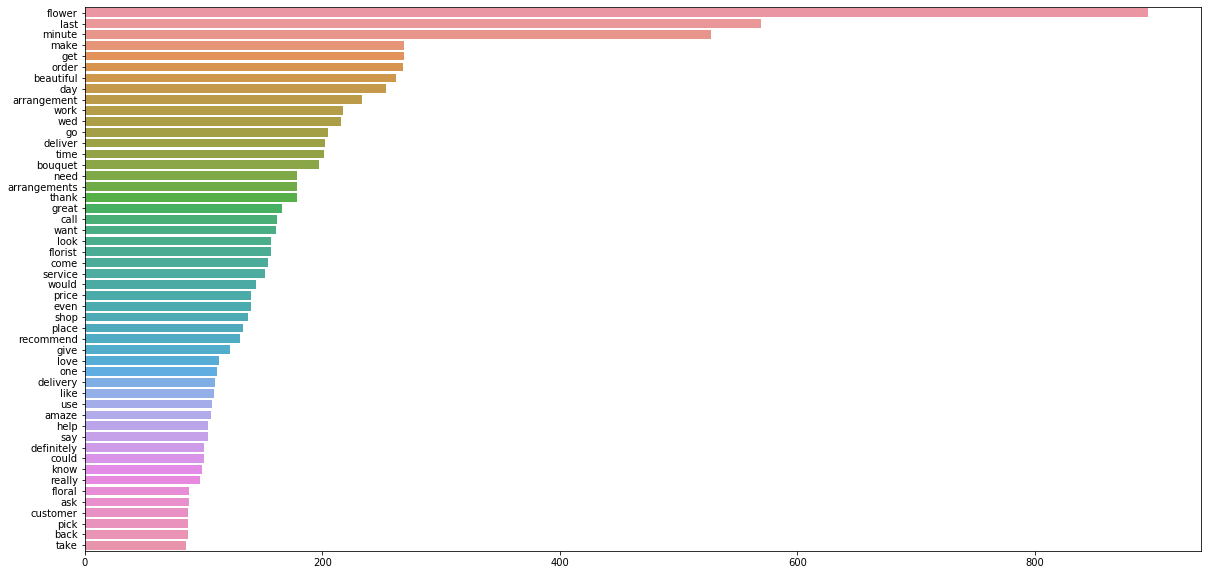

In [570]:
plt.figure(figsize=(20,10))
top_tweet_bigrams=get_top_tweet_unigrams(recommendation.lemmatized)[:50]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

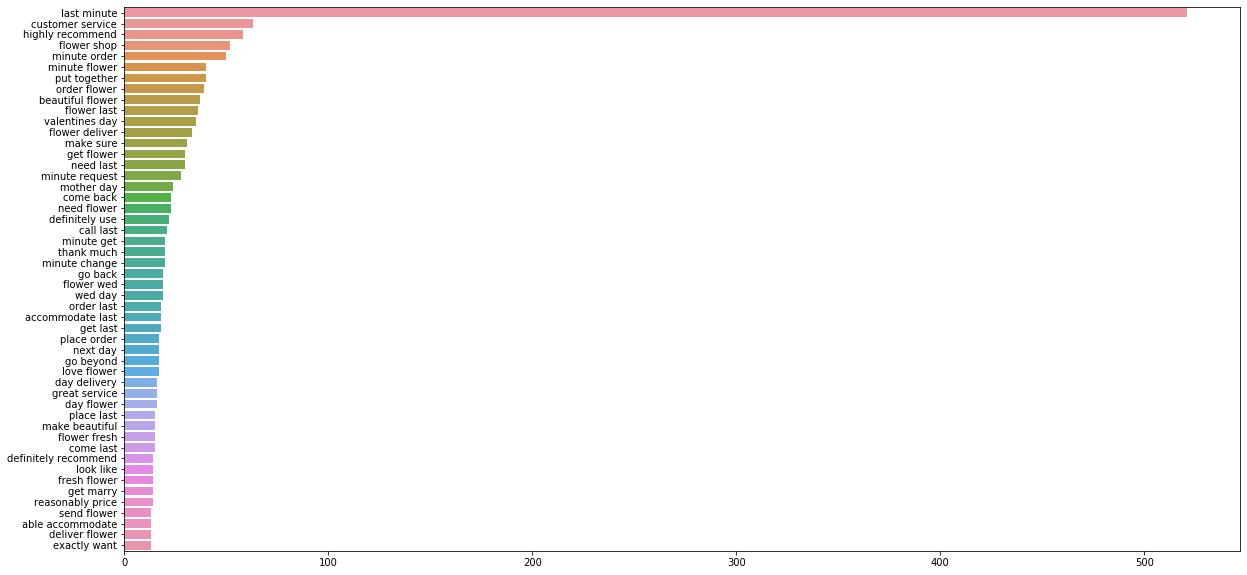

In [637]:
plt.figure(figsize=(20,10))
top_tweet_bigrams=get_top_tweet_bigrams(recommendation.lemmatized)[:50]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [144]:
get_top_tweet_bigrams(florist_review)

[('customer service', 226),
 ('highly recommend', 207),
 ('flower shop', 192),
 ('order flower', 144),
 ('beautiful flower', 112),
 ('flower deliver', 104),
 ('last minute', 102),
 ('put together', 89),
 ('send flower', 87),
 ('flower wed', 85),
 ('get flower', 85),
 ('make sure', 82),
 ('reasonable price', 67),
 ('new york', 64),
 ('place order', 64),
 ('look like', 63),
 ('beautiful arrangement', 63),
 ('come back', 60),
 ('go back', 57),
 ('floral design', 56),
 ('beautiful bouquet', 55),
 ('flower beautiful', 51),
 ('wed flower', 51),
 ('buy flower', 51),
 ('next day', 50),
 ('flower arrangement', 50),
 ('need flower', 49),
 ('sprout home', 49),
 ('definitely use', 48),
 ('first time', 48),
 ('deliver time', 45),
 ('fresh flower', 45),
 ('thank much', 44),
 ('starbright floral', 44),
 ('within budget', 43),
 ('wed day', 43),
 ('floral arrangement', 42),
 ('love flower', 42),
 ('even though', 41),
 ('price range', 41),
 ('go beyond', 41),
 ('take care', 41),
 ('would definitely', 41

In [505]:
recommendation.lemmatized

0        send flower valentines day twice starbright pl...
2        starbright wed floral arrangements august 2019...
21       enormous establishment full flower many differ...
40       general idea floral design want best word word...
44       anytime occasion immediately turn starbright f...
                               ...                        
10653    karens garden amaze job sisters wed really go ...
10656    excellent service good quality flower reasonab...
10675    one best florists la cousins wed grandfathers ...
10685    flower wed couldnt perfect want something colo...
10692    karen best would highly recommend moment walk ...
Name: lemmatized, Length: 1051, dtype: object

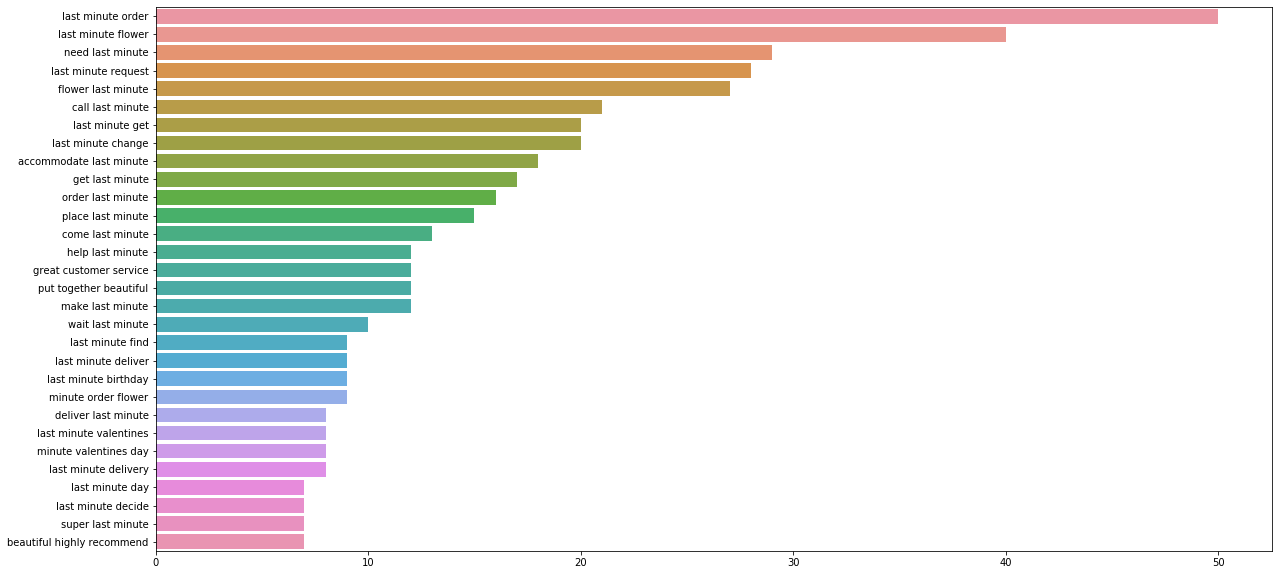

In [634]:
plt.figure(figsize=(20,10))
top_tweet_trigrams=get_top_tweet_trigrams(recommendation.lemmatized)[:30]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

In [132]:
florist_review[0]

'the flower be beautiful they arrive when we need them and the person take the order on the phone be very pleasant'

In [8]:
valentine['text'] = valentine['description']

In [66]:
df1.head()

,Unnamed: 0,vendor,streetAddress,city,state,postalCode,author,ratingValue,datePublished,description,text,lemmatize_token
0,0,Scotts Flowers NYC,15 West 37th St,New York,NY,10018,Beth L.,5.0,2020-02-16,The flowers were beautiful! They arrived when ...,The flowers were beautiful! They arrived when ...,"[flower, beautiful, arrive, person, take, orde..."
1,1,Scotts Flowers NYC,15 West 37th St,New York,NY,10018,Robert G.,5.0,2020-01-14,I've only been here maybe three times and my F...,I've only been here maybe three times and my F...,"[maybe, three, time, fiance, love, three, exce..."
2,2,Scotts Flowers NYC,15 West 37th St,New York,NY,10018,Zac H.,5.0,2020-02-15,I vowed never to use Yelp again after an unfor...,I vowed never to use Yelp again after an unfor...,"[vowed, never, yelp, unfortunate, photo, leak,..."
3,3,Scotts Flowers NYC,15 West 37th St,New York,NY,10018,Liz K.,5.0,2018-12-12,Seems like a solid event and delivery florist ...,Seems like a solid event and delivery florist ...,"[seem, solid, event, delivery, florist, bouque..."
4,4,Scotts Flowers NYC,15 West 37th St,New York,NY,10018,Cassandra N.,3.0,2019-02-18,My boyfriend has used Scotts 7 times since we ...,My boyfriend has used Scotts 7 times since we ...,"[boyfriend, scott, time, since, start, date, a..."


In [68]:
df1['lemmatize_token']

0       [flower, beautiful, arrive, person, take, orde...
1       [maybe, three, time, fiance, love, three, exce...
2       [vowed, never, yelp, unfortunate, photo, leak,...
3       [seem, solid, event, delivery, florist, bouque...
4       [boyfriend, scott, time, since, start, date, a...
                              ...                        
2063    [adore, jerome, florist, since, move, nyc, onl...
2064    [jerome, florist, year, quality, never, disapp...
2065    [family, guy, year, never, disappointed, arran...
2066    [give, guy, prop, late, afternoon, valentine, ...
2067    [beautiful, selection, fresh, flower, plant, e...
Name: lemmatize_token, Length: 2068, dtype: object

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(["florist", "flower", "bouquet", "everything", ""])

In [520]:
from gensim.utils import simple_preprocess

In [521]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [522]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

In [630]:
def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    
    df['text'] = strip_newline(df.lemmatized)
    words = list(sent_to_words(df.lemmatized))
    words = remove_stopwords(words)
    bigram = bigrams(words)
    bigram = [bigram[review] for review in words]
#     lemma = lemmatization(bigram)
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [524]:
import gensim

In [629]:
recommendation.head()

,Unnamed: 0,vendor,streetAddress,city,state,postalCode,author,ratingValue,datePublished,description,lemmatized,sentiment_score,date,Month,text
3,3,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Kat D.,5.0,2019-12-18,"Holy Moly! Top notch customer service, super q...",holy moly top notch customer service super qui...,0.248626,2019-12-18,12,"Holy Moly! Top notch customer service, super q..."
42,42,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Abbey R.,5.0,2018-11-17,I've ordered from Starbright plenty of times. ...,ive order starbright plenty time upscale flowe...,0.420330,2018-11-17,11,I've ordered from Starbright plenty of times. ...
47,47,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Lo P.,5.0,2018-10-02,Starbright is best in class for floral arrange...,starbright best class floral nic team brillian...,0.418229,2018-10-02,10,Starbright is best in class for floral arrange...
56,56,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Chantel Y.,5.0,2018-07-13,Something came up and our company had to place...,something come company place last minute order...,0.149306,2018-07-13,7,Something came up and our company had to place...
73,73,Starbright Floral Design,140 W 26th StGround Fl,New York,NY,10001,Cynthia B.,5.0,2018-03-05,Beautiful arrangements and such HELPFUL & FRIE...,beautiful helpful friendly staff nicely help l...,0.191667,2018-03-05,3,Beautiful arrangements and such HELPFUL & FRIE...


In [631]:
train_corpus, train_id2word, bigram_train = get_corpus(recommendation)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [527]:
bigram_train

[['holy',
  'moly',
  'top',
  'notch',
  'customer_service',
  'super',
  'quick',
  'delivery',
  'manhattan',
  'beautiful',
  'arrangement',
  'admittedly',
  'last_minute',
  'gift',
  'buyer',
  'rely',
  'last_minute',
  'availability',
  'starbright',
  'able',
  'help',
  'ordered',
  'online',
  'called',
  'confirm',
  'questions',
  'double',
  'check',
  'order',
  'would',
  'arrive',
  'time',
  'kind',
  'patient',
  'order',
  'delivery',
  'took',
  'less',
  'hours',
  'busy',
  'holiday',
  'season',
  'saying',
  'lot',
  'grateful',
  'making',
  'boo',
  'birthday',
  'special'],
 ['ordered',
  'starbright',
  'plenty',
  'times',
  'upscale',
  'flower',
  'delivery',
  'chelsea',
  'nyc',
  'customer_service',
  'fast',
  'helpful',
  'flowers',
  'always',
  'delivered',
  'gorgeously',
  'every',
  'time',
  'needed',
  'something',
  'last_minute',
  'would',
  'try',
  'deliver',
  'within',
  'hour',
  'window',
  'selected',
  'flowers',
  'arrangements',

In [496]:
import warnings

In [648]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train4 = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=5,
                           id2word=train_id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=100,
                           eval_every = 1,
                           per_word_topics=True)

In [649]:
lda_train4.print_topics(5,num_words=10)

[(0,
  '0.039*"deliver" + 0.032*"call" + 0.028*"delivery" + 0.022*"day" + 0.016*"great" + 0.016*"thank" + 0.015*"send" + 0.014*"make" + 0.014*"phone" + 0.013*"time"'),
 (1,
  '0.037*"wed" + 0.020*"work" + 0.017*"make" + 0.015*"day" + 0.015*"want" + 0.015*"even" + 0.013*"know" + 0.013*"could" + 0.012*"time" + 0.012*"go"'),
 (2,
  '0.031*"work" + 0.025*"thank" + 0.022*"amaze" + 0.019*"need" + 0.017*"wed" + 0.017*"make" + 0.016*"accommodate" + 0.014*"great" + 0.014*"deliver" + 0.014*"floral"'),
 (3,
  '0.024*"need" + 0.021*"go" + 0.019*"shop" + 0.019*"place" + 0.019*"look" + 0.014*"even" + 0.013*"like" + 0.013*"make" + 0.013*"come" + 0.013*"great"'),
 (4,
  '0.026*"pick" + 0.021*"time" + 0.019*"gift" + 0.018*"shop" + 0.017*"plant" + 0.017*"last" + 0.016*"make" + 0.014*"help" + 0.013*"call" + 0.013*"give"')]

In [502]:
from pyLDAvis import gensim

In [555]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_train4, train_corpus, train_id2word)
vis

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.161655 -0.025884       1        1  27.472279
3     -0.028773  0.105609       2        1  21.260962
1      0.013078 -0.042131       3        1  18.692368
4     -0.047609  0.080335       4        1  17.802044
2     -0.098352 -0.117930       5        1  14.772346, topic_info=    Category        Freq           Term       Total  loglift  logprob
37   Default  118.000000        wedding  118.000000  30.0000  30.0000
93   Default  262.000000    arrangement  262.000000  29.0000  29.0000
88   Default  101.000000  valentine_day  101.000000  28.0000  28.0000
361  Default  264.000000         called  264.000000  27.0000  27.0000
22   Default  109.000000         online  109.000000  26.0000  26.0000
..       ...         ...            ...         ...      ...      ...
40    Topic5   35.477699          would  264.172028  -0.0953  -4.6511
107   Topic5   31.257906        florist  174.773666   0.1912  -4.7777
205   Topic5   28.806730         friend  124.541656   0.4484  -4.8594
82    Topic5   27.428646       received  129.617035   0.3594  -4.9084
111   Topic5   28.361547            get  207.267548  -0.0766  -4.8750

[344 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
401       1  0.098808  absolutely
401       2  0.254078  absolutely
401       3  0.042346  absolutely
401       4  0.367002  absolutely
401       5  0.254078  absolutely
...     ...       ...         ...
146       3  0.132014         yet
146       4  0.044005         yet
419       1  0.146399        york
419       2  0.219599        york
419       5  0.585596        york

[846 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])

In [90]:
!pip install https://github.com/vi3k6i5/GuidedLDA.git

     \ 143kB 2.8MB/s
  ERROR: Cannot unpack file /private/var/folders/4x/qff66z_513d1hv2zhx2wb0qc0000gn/T/pip-unpack-k6pdf5tn/GuidedLDA.git (downloaded from /private/var/folders/4x/qff66z_513d1hv2zhx2wb0qc0000gn/T/pip-req-build-caiastiz, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /private/var/folders/4x/qff66z_513d1hv2zhx2wb0qc0000gn/T/pip-req-build-caiastiz


In [98]:
import numpy as np
from lda import guidedlda as glda
from lda import glda_datasets as gldad

In [96]:
train_corpus, train_id2word, bigram_train = get_corpus(df)

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
df

,Unnamed: 0,author,ratingValue,datePublished,description,text
0,0,S K.,4.5,2020-01-17,Flowers looked exactly like they were online. ...,Flowers looked exactly like they were online. ...
1,1,Sakura N.,5.0,2019-11-10,What a lovely flower shop. I wanted something ...,What a lovely flower shop. I wanted something ...
2,2,Kat D.,5.0,2019-12-18,"Holy Moly! Top notch customer service, super q...","Holy Moly! Top notch customer service, super q..."
3,3,Tick...tick...tock...Clock C.,5.0,2019-06-12,Customer service still exists in NYC-especiall...,Customer service still exists in NYC-especiall...
4,4,Marla F.,5.0,2018-09-22,Had surgery and 3 of my coworkers ordered flow...,Had surgery and 3 of my coworkers ordered flow...
...,...,...,...,...,...,...
315,315,Caroline A.,5.0,2007-05-28,Reason number 9879813478238761553 I am a lucky...,Reason number 9879813478238761553 I am a lucky...
316,316,Jellia J.,4.0,2007-06-15,I had never been to the Floral District before...,I had never been to the Floral District before...
317,317,YWCA N.,4.0,2011-07-06,Starbright Floral Design has done it again. T...,Starbright Floral Design has done it again. T...
318,318,Suela N.,5.0,2010-06-17,Starbright designed the coolest centerpieces f...,Starbright designed the coolest centerpieces f...


In [99]:
X = gldad.load_data(gldad.NYT)
vocab = gldad.load_vocab(gldad.NYT)
word2id = dict((v, idx) for idx, v in enumerate(vocab))
# print(X[:10])




# print("TESTING....")

seed_topic_list = [['wedding'],
                   ['valentine'],
                   ['birthday', 'bday'],
                   ['gift', 'present'],
                   ['party', 'shower']]

model = glda.GuidedLDA(n_topics=5, n_iter=100, random_state=7, refresh=20)

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

model.fit(train_corpus, seed_topics=seed_topics, seed_confidence=0.15)





n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    
# Topic 0: game play team win season player second point start victory
# Topic 1: company percent market price business sell executive pay plan sale
# Topic 2: play life man music place write turn woman old book
# Topic 3: official government state political leader states issue case member country
# Topic 4: school child city program problem student state study family group

FileNotFoundError: [Errno 2] No such file or directory: '/opt/anaconda3/lib/python3.7/site-packages/lda/tests/nyt.ldac'

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
token_vectorizer = CountVectorizer(tokenizer = reflection_tokenizer, min_df=10, stop_words=stop_words, ngram_range=(1, 4))
X = token_vectorizer.fit_transform(florist_review)

NameError: name 'reflection_tokenizer' is not defined

In [19]:
# Importing modules

import pandas as pd
import numpy as np
import time
import re
from pprint import pprint
import joblib

#NLP
import sklearn
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

#plotting
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt





def get_wordnet_pos(word):
    '''
    tags parts of speech to tokens
    Expects a string and outputs the string and its part of speech
    '''

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def word_lemmatizer(text):
    '''
    lemamtizes the tokens based on their part of speech
    Expects a lits of tokens and outputs a list of lemmatized tokens
    '''

    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text, get_wordnet_pos(text))
    return text

def get_stopwords():
    stop_words = stopwords.words('english')
    stop_words.extend(['mr', 'mrs', 'miss', 'ms', 'ahh', 'ah', 'want', 'feel', 'want', 'goal', 'ela', 'go', 'get', 'like','grade', 'use', 'make',
                  'next', 'well', 'lea', 'also', 'thing', 'one', 'try', 'end', 'turn', 'work', 'math', 'try', 'sol', 'science','week', 'would',
                 'class', 'need', 'exit', 'ticket', 'sure', 'strategy', 'exit','grade', 'good', 'best', 'able', 'lot', 'think', 'help'])
#                 'could', 'really', 'improve', 'time', 'plant', 'flower', 'shop', 'price', 'place', 'great', 'bouquet', 'store', 'look', 'come', 'beautiful', 'selection', 'love', 'nice', 'helpful'])
    return stop_words


def reflection_tokenizer(text):
    '''
    Tokenizes a list of string, expects a list of strings and outputs a list of strings.
    before tokenizing:
    1)removes the non-alphanumeric charcaters like emojies
    2)removes the numbers
    3)lower cases the words
    4)tokenizes the sentences
    5)lemmatizes teh tokens
    6)removes the tokens in stop words list
     '''

    text=re.sub(r'[\W_]+', ' ', text) #keeps just alphnumeric characters
    text=re.sub(r'\d+', '', text) #removes numbers
    text = text.lower()
    tokens = [word for word in word_tokenize(text)]
    tokens = [word for word in tokens if len(word) >= 3]#removes smaller than 3 character
    tokens = [word_lemmatizer(w) for w in tokens]
    tokens = [s for s in tokens if s not in get_stopwords()]
    return tokens

In [20]:
df1.description

0       The flowers were beautiful! They arrived when ...
1       I've only been here maybe three times and my F...
2       I vowed never to use Yelp again after an unfor...
3       Seems like a solid event and delivery florist ...
4       My boyfriend has used Scotts 7 times since we ...
                              ...                        
2063    I adore Jerome Florist. I've been using them s...
2064    I have used Jerome Florist for 5+ years, and t...
2065    My family has been using these guys for years,...
2066    I have to give these guys props.  I went in on...
2067    Beautiful selection of fresh flowers and plant...
Name: description, Length: 2068, dtype: object

In [21]:
df1['lemmatize_token'] = df1.description.apply(reflection_tokenizer)

In [22]:
import nltk

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/augustinechang/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [173]:
df1.lemmatize_token

0       [flower, beautiful, arrive, person, take, orde...
1       [maybe, three, fiance, love, three, exceed, ex...
2       [vowed, never, yelp, unfortunate, photo, leak,...
3       [seem, solid, event, delivery, florist, bouque...
4       [boyfriend, scott, since, start, date, arrange...
                              ...                        
2063    [adore, jerome, florist, since, move, nyc, onl...
2064    [jerome, florist, year, quality, never, disapp...
2065    [family, guy, year, never, disappointed, arran...
2066    [give, guy, prop, late, afternoon, valentine, ...
2067    [beautiful, selection, fresh, flower, plant, e...
Name: lemmatize_token, Length: 2068, dtype: object

In [24]:
token_vectorizer = CountVectorizer(tokenizer = reflection_tokenizer, min_df=10, stop_words=stop_words, ngram_range=(1, 4))
X = token_vectorizer.fit_transform(df1.description)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [25]:
tf_feature_names = token_vectorizer.get_feature_names()
word2id = dict((v, idx) for idx, v in enumerate(tf_feature_names))



In [44]:
seed_topic_list = [['wedding'],
                   ['valentine', 'day', 'rose', 'girlfriend'],
                   ['birthday', 'bday'],
                   ['gift', 'present']]

In [56]:
model = glda.GuidedLDA(n_topics=10, n_iter=100, random_state=7, refresh=10)
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id
model.fit(X, seed_topics=seed_topics, seed_confidence=0.90)

/opt/anaconda3/lib/python3.7/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


In [49]:
import numpy as np
from lda import guidedlda as glda
from lda import glda_datasets as gldad

In [57]:
n_top_words = 15
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
     topic_words = np.array(tf_feature_names)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: wedding flower bouquet arrangement beautiful look florist recommend budget day amaze richard floral centerpiece everything
Topic 1: day order flower arrangement deliver delivery call time beautiful sent bouquet valentine email say valentine day
Topic 2: flower arrangement order service friend florist beautiful deliver birthday time nyc gorgeous recommend starbright highly
Topic 3: flower shop beautiful arrangement bouquet always recommend place great last price amaze gift every helpful
Topic 4: flower say richard review call take florist star give flower richard ask come told someone look
Topic 5: flower love bouquet arrangement look beautiful price florist last even great give amaze wife color
Topic 6: service flower customer arrangement order customer service deliver delivery great time starbright floral beautiful call thank
Topic 7: flower bouquet florist sunny price arrangement really beautiful rose place nice little great shop fresh
Topic 8: plant shop place price store g

In [37]:
df1['description']

0       The flowers were beautiful! They arrived when ...
1       I've only been here maybe three times and my F...
2       I vowed never to use Yelp again after an unfor...
3       Seems like a solid event and delivery florist ...
4       My boyfriend has used Scotts 7 times since we ...
                              ...                        
2063    I adore Jerome Florist. I've been using them s...
2064    I have used Jerome Florist for 5+ years, and t...
2065    My family has been using these guys for years,...
2066    I have to give these guys props.  I went in on...
2067    Beautiful selection of fresh flowers and plant...
Name: description, Length: 2068, dtype: object

In [227]:
lst = [1999, 2000, 2001, 2002, 400000, 4004]

In [241]:
def leap(yrs):
    fp = []
    for i in yrs:
        if i % 4 == 0:
            if i % 100 == 0 and (i/100) % 4 == 0:
                fp.append(True)
            else:
                fp.append(False)
        else:
            fp.append(False)
    return fp

In [242]:
leap(lst)

[False, True, False, False, True, False]

In [243]:
def leap(yrs):
    lep = []
    for i in yrs:
        if i%4 == 0 and i% 100 != 0:
            lep.append(True)
        else:
            lep.append(False)
    return lep

In [244]:
leap(lst)

[False, False, False, False, False, True]